# Statistics and Data Analysis - Assignment 4

ID #1: 311149082

ID #2: 000803254

## 1. Introduction
Gene expression describes the process in which genes that are coded in the DNA of living organisms are transcribed into mRNA. This is part of the bigger process in which genes are being copied (transcribed), processed, translated and modified into the final product, usually a protein. Gene expression profiling measures the levels at which mRNA molecules pertaining to the genes profiled are observed in a sample.

In this exercise, we will perform guided analysis, comparing expression profiles of circulating endothelial cells (CECs) in patients with acute myocardial infraction to CECs in healthy controls. A comparison of two sample classes.

## 2. The Data Set
The data set was taken from:
<br>
1) Dataset record in NCBI:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE66360
<br>
2) Published paper: Muse et al, Sci Rep 2017 https://www.nature.com/articles/s41598-017-12166-0
<br>

We extracted the data matrix and provide it as a separate csv attachment (link to download). The csv file needs to be pre-processed before moving to the main analysis steps. Some information should be removed but make sure that you keep all information that is important for the analysis. Specifically, all expression values should be kept and the label of each sample (H – Healthy, M - Myocardial Infraction).
The paper describes a study that seeks to develop an expression-based signature that can detect AMI in patients in a non-invasive manner, by profiling CECs.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy import stats
from scipy.special import comb
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Statistics/AMI_GSE66360_series_matrix.csv'
#file_path = 'AMI_GSE66360_series_matrix.csv'
df = pd.read_csv(file_path, index_col='ID_REF', low_memory=False, skiprows=60)
classes = list(pd.read_csv(file_path, low_memory=False, skiprows=58).iloc[0])[1:]
df.head(10)

,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,GSM1620829,GSM1620830,GSM1620831,GSM1620832,GSM1620833,GSM1620834,GSM1620835,GSM1620836,GSM1620837,GSM1620838,GSM1620839,GSM1620840,GSM1620841,GSM1620842,GSM1620843,GSM1620844,GSM1620845,GSM1620846,GSM1620847,GSM1620848,GSM1620849,GSM1620850,GSM1620851,GSM1620852,GSM1620853,GSM1620854,GSM1620855,GSM1620856,GSM1620857,GSM1620858,...,GSM1620878,GSM1620879,GSM1620880,GSM1620881,GSM1620882,GSM1620883,GSM1620884,GSM1620885,GSM1620886,GSM1620887,GSM1620888,GSM1620889,GSM1620890,GSM1620891,GSM1620892,GSM1620893,GSM1620894,GSM1620895,GSM1620896,GSM1620897,GSM1620898,GSM1620899,GSM1620900,GSM1620901,GSM1620902,GSM1620903,GSM1620904,GSM1620905,GSM1620906,GSM1620907,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
ID_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1007_s_at,5.866378,4.948736,5.148384,5.064419,5.017833,5.116154,5.431328,5.235271,5.773528,6.016415,5.984605,6.444126,4.919960,5.511752,5.663843,4.562416,5.237784,5.310519,5.249899,5.511501,4.949108,5.151583,5.126908,5.539607,5.283399,5.288732,6.555455,5.566308,5.765327,5.138168,6.135884,5.421968,6.163869,6.061936,6.837307,5.226223,6.137945,6.444286,6.691463,7.291127,...,5.625817,6.622019,5.606178,5.623932,5.144286,5.669553,5.518466,5.052428,5.003858,6.162639,6.173933,5.601772,7.522881,5.344029,5.420405,6.644434,5.831683,6.726176,5.653633,5.978695,6.242491,5.296552,5.547583,5.916523,5.889478,6.195676,6.112345,5.432320,4.712710,5.266185,5.419482,5.057716,5.996493,5.343133,5.558892,6.472517,5.678816,5.653286,6.013841,5.465334
1053_at,8.225790,7.525865,7.764637,7.198461,7.831450,7.203592,7.694551,7.760259,8.279814,7.580841,7.552294,8.158129,7.799661,7.856591,6.849618,7.956047,7.710327,7.984931,8.708723,8.087234,7.872137,8.146644,7.904487,7.590672,7.527726,7.911499,7.481720,7.589783,7.652970,7.371918,7.540215,8.388448,7.738484,7.830074,8.024728,6.805196,7.695904,7.808028,6.908924,5.840952,...,8.981583,5.241895,7.586671,8.316902,7.359246,8.219957,8.387229,5.919231,7.409556,5.759001,7.631741,7.119643,7.627191,8.714694,8.051429,8.034723,7.149727,7.992438,6.324309,6.869008,7.336013,5.606799,6.272012,8.091684,7.513029,8.307557,7.377023,7.448598,8.171620,5.657305,7.226348,7.105538,5.354105,8.271500,5.963346,8.261422,6.925753,7.918424,7.442701,9.225221
117_at,6.179732,6.628137,5.859151,5.974135,6.793079,6.435229,6.320546,6.483590,6.387779,6.307066,5.899590,5.753603,5.880342,7.006409,6.818826,6.524126,7.196084,7.691034,9.468659,7.496835,6.577698,7.188136,6.005948,6.854797,6.078463,8.215252,8.618611,7.630854,9.881016,6.494238,8.415818,10.406628,10.553905,9.281038,6.312273,6.733495,6.136814,7.929140,8.378925,7.376952,...,6.505867,6.700617,9.202062,7.069372,7.422028,7.191427,8.011480,6.418589,6.934743,6.218758,6.382497,7.228286,8.901740,7.504154,6.683246,7.046562,7.024474,6.539077,6.016342,6.249162,7.014302,7.080036,6.157005,6.285222,7.039646,6.815898,7.081595,6.803709,6.645631,6.439076,6.789501,7.441940,7.026929,6.003973,7.474326,6.367759,6.835756,7.577035,7.147417,6.481128
121_at,6.179478,6.582889,6.602135,6.545905,5.911542,6.285420,6.562316,6.345888,6.272806,5.971847,6.390803,6.516453,5.791862,6.038037,6.643061,6.364274,6.412887,6.296483,6.427513,6.191956,6.212989,6.498877,6.621110,6.391191,6.203988,6.456057,6.354805,6.243216,6.059570,6.325854,5.772116,6.400147,6.314747,7.014391,5.943976,6.003585,5.874296,6.041638,6.934797,7.432126,...,7.015512,7.839276,6.588716,6.918176,6.521666,7.337136,6.831247,5.753068,6.679376,6.304338,6.794505,6.965493,6.925629,6.469703,7.301405,6.750564,6.920165,8.217956,6.053189,6.657831,6.380338,6.159523,6.644260,6.187347,6.679325,7.948634,7.989819,7.089705,6.265223,5.857541,6.513437,6.317523,7.413453,6.809103,5.949091,6.440978,6.955883,6.499215,6.587065,6.897591
1255_g_at,2.792048,2.695714,2.580181,2.712124,2.723687,2.706684,2.674747,2.635150,2.696649,2.8028

In [ ]:
# Verify that there are only two classes
np.unique(classes)

array(['H', 'M'], dtype='<U1')

## 3. Analysis

#### a. High level description of the data and some pre-processing:

1. How many genes profiled? 

In [ ]:
print(f'There were {df.shape[0]} genes profiled.')

There were 54675 genes profiled.


2. How many samples (subjects/patients) in total?

In [ ]:
print(f'There were {df.shape[1]} samples (subjects/patients) in total.')

There were 99 samples (subjects/patients) in total.


3. How many samples in each class?

In [ ]:
M_count = classes.count('M')
H_count = classes.count('H')

print(f'There are {M_count} samples in the M class')
print(f'There are {H_count} samples in the H class')

There are 49 samples in the M class
There are 50 samples in the H class


4. If there are missing values, then remove the entire row
(gene) from the data matrix.
How many rows left now?

In [ ]:
prev_genes = df.shape[0]
# Remove all rows with missing values
df.dropna(inplace=True)
# Print the results after removing
print(f"There are now {df.shape[0]} genes remaining. We removed a total of {prev_genes-df.shape[0]}.")

There are now 54628 genes remaining. We removed a total of 47.


5. Pick 20 genes at random. Draw histograms comparing
expression levels of each of these genes in the two
classes M and H.


              GSM1620819  GSM1620820  ...  GSM1620916  GSM1620917
ID_REF                                ...                        
220081_x_at    10.271837   10.303869  ...    9.545495    9.476377
1563091_at      2.567804    4.829729  ...    2.546151    3.458115
205951_at       3.568512    4.351566  ...    3.960271    4.521624
240044_x_at    11.799649   11.865034  ...   12.151634   11.718807
1566428_at      6.145427    6.024960  ...    3.409852    4.618604
220501_at       3.251197    4.007477  ...    4.221420    5.441593
222747_s_at     5.310927    5.827050  ...    6.501310    4.415738
53076_at        7.955875    7.298590  ...    7.918360    7.549763
243854_at       3.337483    3.889759  ...    4.031646    4.434524
216976_s_at     5.997806    5.889881  ...    7.464988    5.528034
211630_s_at     8.637866    8.229689  ...    8.163366    8.475386
206454_s_at     4.704587    4.911277  ...    5.051619    5.241215
1554295_x_at    6.751541    7.340939  ...    6.271112    7.516603
214487_s_a

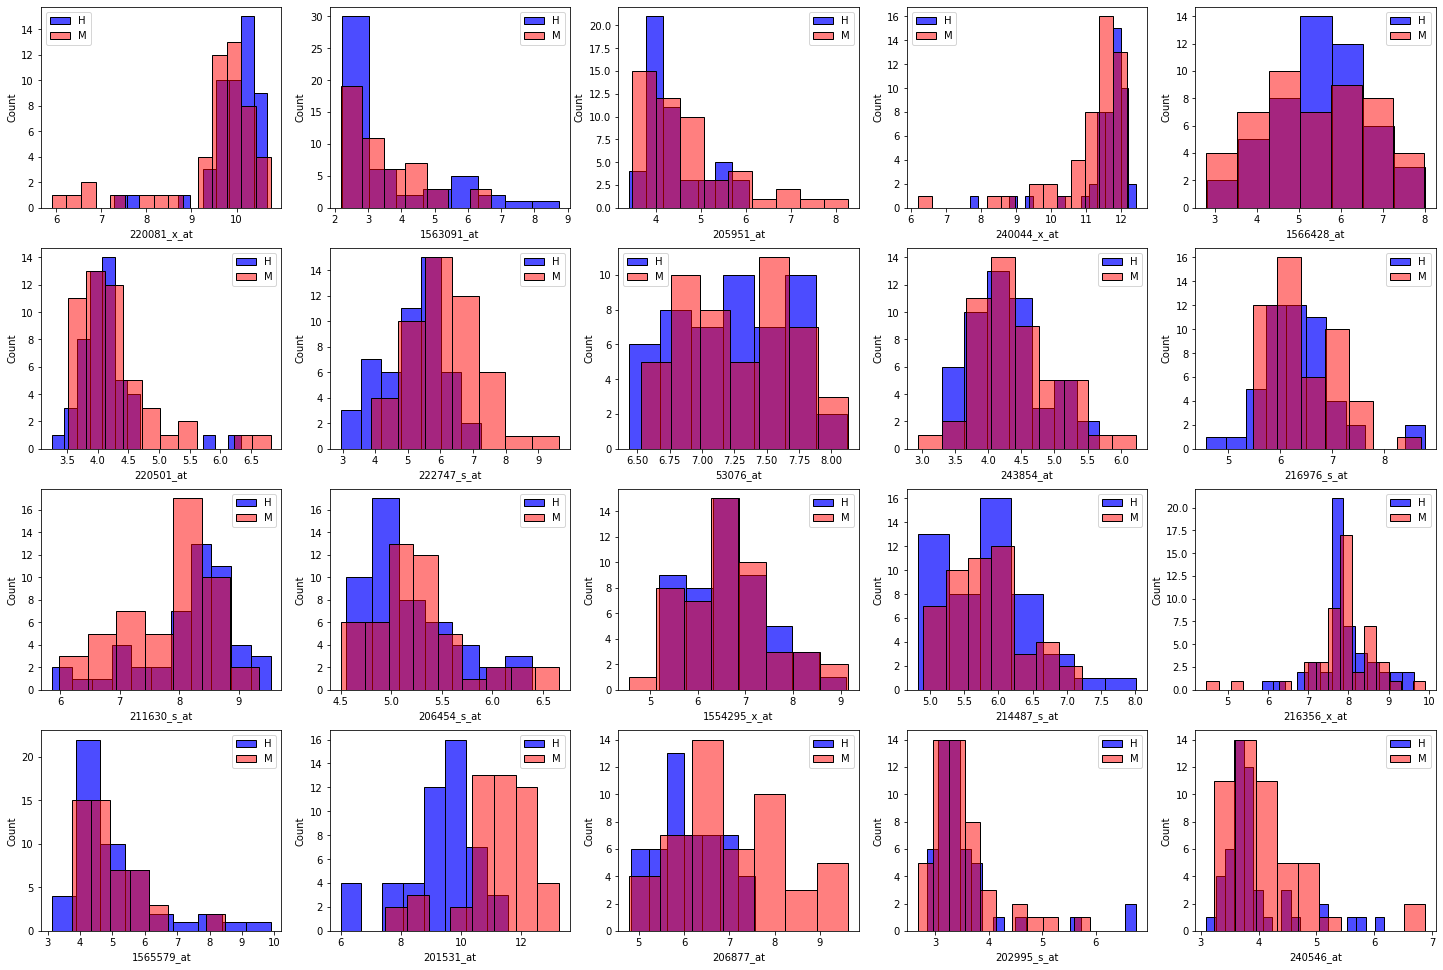

In [ ]:
# Select the 20 random genes
df_20 = df.sample(n = 20)
print(df_20)

df_20.loc["Class"] = classes
df_20 = df_20.T

# Seperate the dataframe into classes
df_20_H = df_20[df_20["Class"]=="H"].drop(['Class'], axis=1)
df_20_M = df_20[df_20["Class"]=="M"].drop(['Class'], axis=1)

# Plot the histograms
genes = df_20_H.columns

fig, axes = plt.subplots(4,5, figsize=(25,17))
for row in range(4):
    for column in range(5):
        gene = genes[(row*5)+column]
        sns.histplot(data=df_20_H, x=gene, color="Blue", alpha=0.7, label="H", ax=axes[row][column])
        sns.histplot(data=df_20_M, x=gene, color="Red", alpha=0.5, label="M",ax=axes[row][column])
        axes[row][column].legend()
plt.show()

#### b. WRS for differential expression (DE)


1. Consider some gene, g. Under the null model (which assumes that
for g there is no M vs H DE), what is the expected sum of ranks of
g’s expression levels measured for samples labeled M?

We denote 
$H_0 :$ There is no Differential Expression bettween M and H for every gene.


Therefore, for any given g, when we asssume its distribution under the Null Model, we getthat the expected sum of ranks of a chosen label (H or M): $$E(T) = \frac{B(N+1)}2$$<br>


In [ ]:
# Denote B to be the total amount of samples with label=M
B = M_count
N = len(df.columns)
T = B * ((N+1)/2)
print(f"In our case, the expected sum of ranks for any given gene g is: {T}")

In our case, the expected sum of ranks for any given gene g is: 2450.0


2. Denote this sum of ranks by RS(g). What is the maximal value, c,
that RS(g) can take?

The maximal value can only be achieved if we have that our samples are distributed in a way that the all the "M" samples are ordered last. They would therefore, acheive higher rank values and thus a higher RS score

In [ ]:
# We need to sum all the numbers from M_count+(M_count+1)+.....+Total
total = H_count+M_count
print(f"The minimal RS(g) would be: {total*(total+1)//2 - H_count*(H_count+1)//2}")

The minimal RS(g) would be: 3675


3. Under the null model, what is the probability of RS(g) = c?
(provide a formula for this and explain it)


There  exist only one such ordering where all the "M" samples acheive the higher rank values. Therefore, the probability of RS(g) = c where c is maximal: $$P(RS(g) = c) = \frac{1 }{N \choose B}$$

In [ ]:
print(f'We get P(RS(g) = c) = 1 / (N choose B) = {1 / comb(N, B)}')

We get P(RS(g) = c) = 1 / (N choose B) = 1.982330604283668e-29


4. Under the null model, what is the probability of RS(g) = c-1? what is
the probability of RS(g) = c-2?
(provide formulas and explain them)


$RS(g) = c-1 :$ <br>
    In this case, as all rank vectors are equally distributed, they all have the same probability of occuring, thus, $P(RS(g) = c-1) = \frac{1 }{N \choose B}$

$RS(g) = c-2 :$ <br>
    In this case, as all rank vectors are equally distributed, however, there are 2 ways to get the same thing, thus, $P(RS(g) = c-1) = \frac{2 }{N \choose B}$

In [ ]:
print(f'We get that (RS(g) = c-1) = 1 / (N choose B) = {1 / comb(N, B)}')
print(f'We get that  (RS(g) = c-2) = 2 / (N choose B) = {2 / comb(N, B)}')

We get that (RS(g) = c-1) = 1 / (N choose B) = 1.982330604283668e-29
We get that  (RS(g) = c-2) = 2 / (N choose B) = 3.964661208567336e-29


5. Draw a histogram of the values of RS(g) in the dataset. Here g
ranges over all genes in the data (after the clean-up). Compute the
IQR for this distribtuion.

In [ ]:
def calc_RS(df):
    ranks_df = df.apply(stats.rankdata, axis=1)
    ranks_np = np.array(ranks_df.values.tolist())
    res = []
    sum_M = 0
    # print(ranks_np)
    # print(ranks_np.shape)
    for i in range(len(ranks_np)):
        for j in range(len(ranks_np[i])):
            if classes[j] == 'M':
                sum_M += ranks_np[i][j]
        res.append(sum_M)
        sum_M = 0
    return res

In [ ]:
ranks = calc_RS(df)
print(ranks[:10])

[2304.0, 2604.0, 3063.0, 2540.0, 2598.0, 2210.0, 2010.0, 2691.0, 2033.0, 1924.0]


The IQR = 329.0




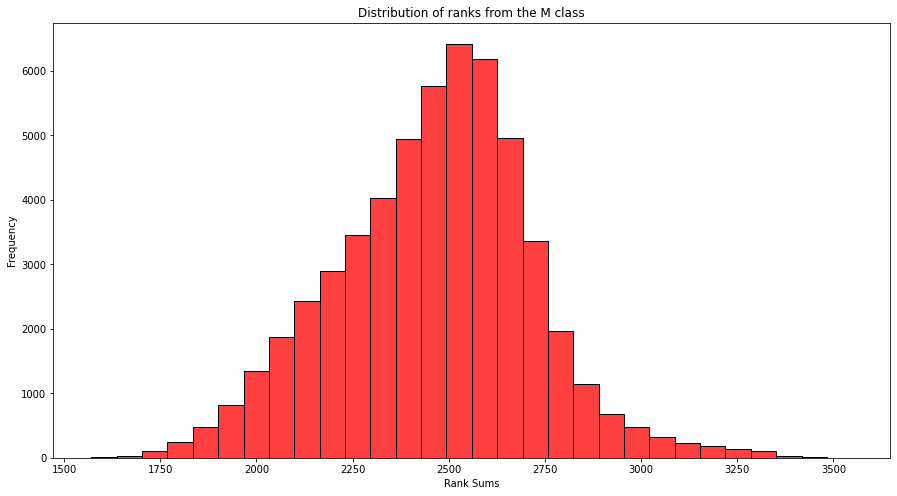

In [ ]:
IQR = stats.iqr(ranks)
fig, axes = plt.subplots(1,1, figsize=(15,8))
sns.histplot(ranks, bins=30, color="Red", ax=axes)
plt.title('Distribution of ranks from the M class')
plt.xlabel('Rank Sums');
plt.ylabel('Frequency');
print(f"The IQR = {IQR}\n\n")

#### c. Differential Expression
The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M. Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test. Report the number of genes overexpressed in M vs H at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H at a p-value of 0.07. For both directions use both a Student ttest and a WRS test.

In [ ]:
p_val = 0.07

##### Using WRS test:

In [ ]:
def WRS_expression_calc(mean,std):
    WRS_P = []
    overexp = 0
    undexp = 0

    for sum_rank in ranks:
        prob =  norm.cdf((sum_rank - mean) / std)
        WRS_P.append(prob)
        # Check for overexpression
        if prob <= p_val:
            overexp += 1
        # Check for underexpression
        elif prob >= (1-p_val):
            undexp +=1
        else:
            continue
    return WRS_P,overexp, undexp

In [ ]:
mean = M_count * ((N)/2)
std = np.sqrt((M_count*(N + 1)*(N - H_count))/12)
WRS_P,overexp, undexp = WRS_expression_calc(mean,std)
print(f"The number of overexpressed values are: {overexp}")
print(f"The number of underexpressed values are: {undexp}")

The number of overexpressed values are: 9555
The number of underexpressed values are: 12875


##### Using Student T test:

In [ ]:
def ttest_expression_calc(df, classes):
    classes1 = np.array(classes)
    H = df.values[:,classes1 == 'H']
    M = df.values[:,classes1 == 'M']

    # get p and t vals
    t_vals, p_vals = stats.ttest_ind(H, M, axis=1)

    # elect the most significant p values
    indices = np.argwhere(p_vals <= p_val).flatten()
    significant_df = df.iloc[indices]
    significant_np = significant_df.values


    #calculate the means of significant values from different classes
    H_means = significant_np[:,classes1 == 'H'].mean(axis=1)
    M_means = significant_np[:,classes1 == 'M'].mean(axis=1)
    


    #calc over and under expressed genes
    overexp = len(significant_np[M_means > H_means])
    undexp = len(significant_np[M_means < H_means])
            
    return p_vals, t_vals,overexp,undexp

In [ ]:
p_vals_T, t_test_T, overexp_T, undexp_T = ttest_expression_calc(df, classes)

print(f"The number of overexpressed values are: {overexp_T}")
print(f"The number of underexpressed values are: {undexp_T}")

The number of overexpressed values are: 5860
The number of underexpressed values are: 6402


#### d. Correlations 
Select the 80 most significant genes from each one of the onesided WRS DE lists you computed in 3c. Generate a set of 160 genes, D, which is the union of the above two sets.

In [ ]:
p_vals_col = pd.Series(WRS_P)
index_list = list(df.index)
df_new = df.reset_index()
df_new.drop(columns='ID_REF', inplace=True)
# Get most sig genes from each of the onesided WRS DE list
largest_pval_inds = list(p_vals_col.sort_values(ascending=False).index[:80])
smalles_pval_inds = list(p_vals_col.sort_values(ascending=True).index[:80])

D_vals = largest_pval_inds + smalles_pval_inds
D = [index_list[x] for x in D_vals]
D[:5],len(D)

(['208869_s_at', '216248_s_at', '204622_x_at', '244054_at', '203888_at'], 160)

1. Compute Kendall 𝜏 correlations in all pairs within D (160
choose 2 numbers). Represent the correlation matrix as a 160x160
heatmap.

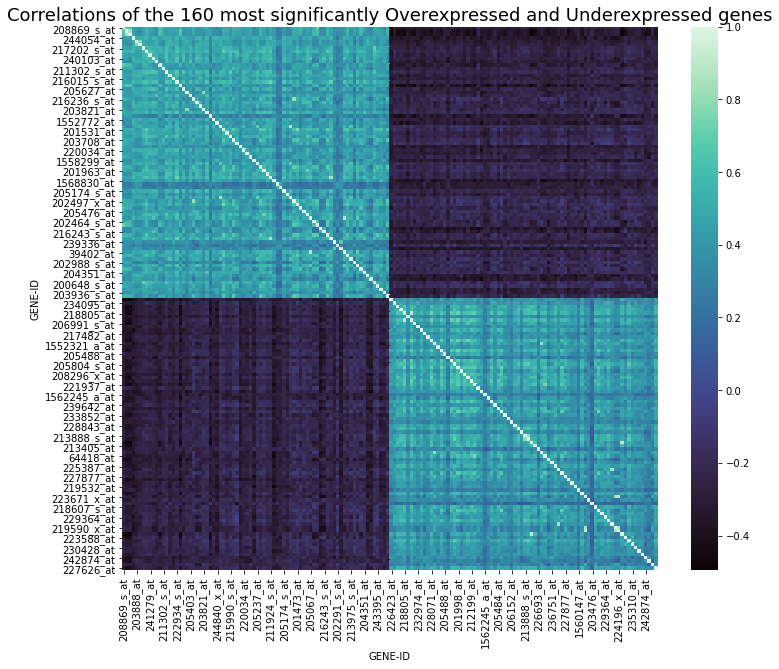

In [ ]:
most_sig_genes_df = df_new.iloc[largest_pval_inds].append(df_new.iloc[smalles_pval_inds])
most_sig_genes_df.index = D


plt.figure(figsize=(12,10))
sns.heatmap(most_sig_genes_df.T.corr(method='kendall'), cmap='mako')
plt.xlabel('GENE-ID')
plt.ylabel('GENE-ID')
plt.title('Correlations of the 160 most significantly Overexpressed and Underexpressed genes', fontsize=18);

2. Under a NULL model that assumes that genes are pairwise
independent, what is the expected value for 𝜏? What is the observed
mean of the numbers you calculated in the above section?

In [ ]:
cor = np.reshape(most_sig_genes_df.T.corr(method='kendall').values,(25600))
cleaned_cor = cor[cor != 1]

In [ ]:

print(f"The observed mean of the numbers is: {np.mean(cleaned_cor)}")

The observed mean of the numbers is: 0.08443955956621585


3. What can you report about co-expression of genes in D (coexpression is inferred from the correlation of the expression
levels of genes, across a set of samples)? Do we observe any
significant co-expression? Explain your answer.


We see that the first 80 genes are overexpressed in M vs H whereas the last 80 genes are underexpressed in M vs H. 
In addition to that we notice that there is a strong positive correlation between the overexpressed genes in M and underexpressed genes in H. 
Furthermore, we see a strong negative correlation between genes underexpressed in H and overexpressed in M. 

4. How many co-expressed pairs do we observe in FDR=0.05?

In [ ]:
print(len(cleaned_cor))

25440


5. What would have been advantages and disadvantages of
computing co-expression for all genes in the study rather than
only for genes in D? 

- Advantages:<br>
    - This provides deeper knowledge into more genes that might lead us into finding previously unseen insights. 

- Disadvantages: <br>
    - Firstly, because many genes have a non significant p-value which means there is no serious difference between the class of M vs H in that gene, then, this would mean that there is no evident reason as to why this specific gene would be correlated to other genes of the same nature. 
    - Secondly, this computation is costly a there are over 50k genes in total and we must compute the correlation for each one relative to all others. This is a very costly computation.

6. Perform the above steps on the same set D, but restrict
attention only to samples labeled M. What do you see now?
Can you explain this?

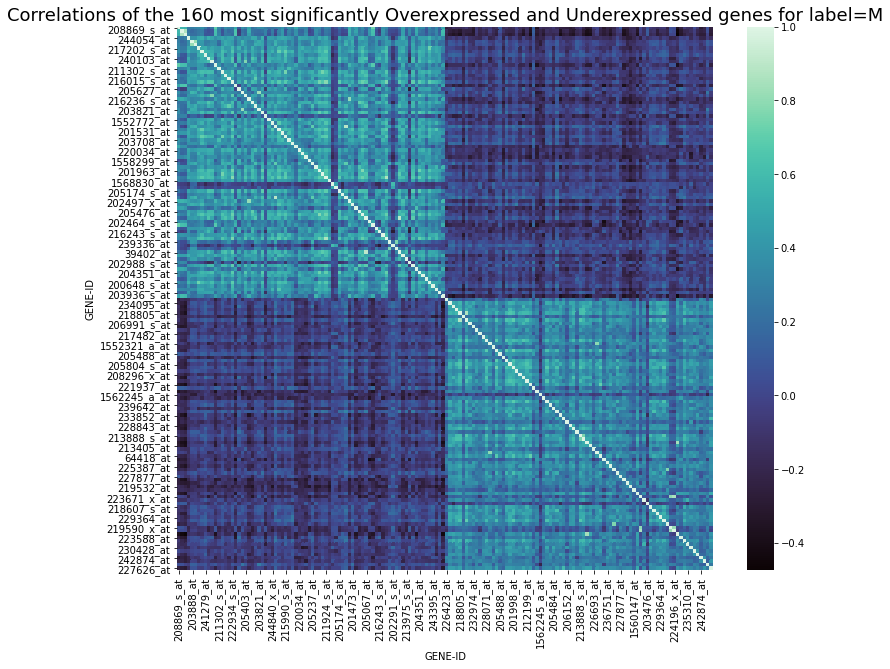

In [ ]:
restricted_view_M = pd.DataFrame(most_sig_genes_df.values[:, np.array(classes) == 'M'], 
                                   index=most_sig_genes_df.index,
                                   columns=most_sig_genes_df.columns[np.array(classes) == 'M'])

plt.figure(figsize=(12,10))
sns.heatmap(restricted_view_M.T.corr(method='kendall'), cmap='mako')
plt.title('Correlations of the 160 most significantly Overexpressed and Underexpressed genes for label=M', fontsize=18);
plt.xlabel('GENE-ID')
plt.ylabel('GENE-ID');

We can see that we acheive similar results even though we have restricted our view to just the M labeled samples. 
However, there is a slight difference and we have a weaker postitive correlation between overexpressed genes in M vs H as well as overexpressed in H vs M. In addition, the genes that are underexpressed in M vs H seem to have a very neutral correlation.

#### e. Plots and Conclusions of the DE and correlation analysis

1. Construct the DE overabundance plots (blue and green lines
as shown in class) for M vs H overexpression (higher
expression levels in M) using WRS and t-test using the results
you had computed in Section 3c.
State, for each comparison, the number of genes, k, at which
we observe:
    - FDR = 0.05
    - FDR = 0.01
    - FDR = 0.005


In [ ]:
# values from WRS
p_vals_WRS_sorted_ind = np.array(WRS_P).argsort()
p_vals_WRS_sorted = np.array(WRS_P)[p_vals_WRS_sorted_ind]

FDR_WRS = p_vals_WRS_sorted * len(df) / np.arange(1, len(df)+1)

print(f'Number of genes that have an FDR close to 0.1 = {np.isclose(FDR_WRS, 0.05, rtol=0.0002).sum()}')
print(f'Number of genes that have an FDR close to 0.05 = {np.isclose(FDR_WRS, 0.01, rtol=0.0002).sum()}')
print(f'Number of genes that have an FDR close to 0.01 = {np.isclose(FDR_WRS, 0.005, rtol=0.0002).sum()}')

Number of genes that have an FDR close to 0.1 = 0
Number of genes that have an FDR close to 0.05 = 1
Number of genes that have an FDR close to 0.01 = 0


In [ ]:
p_vals_T_sorted_ind = p_vals_T.argsort()
p_vals_T_sorted = p_vals_T[p_vals_T_sorted_ind]


FDR_T = p_vals_T_sorted * len(df) / np.arange(1, len(df)+1)
print(f'Number of genes that have an FDR close to 0.05 = {np.isclose(FDR_T, 0.05, rtol=0.0002).sum()}')
print(f'Number of genes that have an FDR close to 0.1 = {np.isclose(FDR_T, 0.01, rtol=0.0002).sum()}')
print(f'Number of genes that have an FDR close to 0.01 = {np.isclose(FDR_T, 0.005, rtol=0.0002).sum()}')

Number of genes that have an FDR close to 0.05 = 4
Number of genes that have an FDR close to 0.1 = 0
Number of genes that have an FDR close to 0.01 = 0


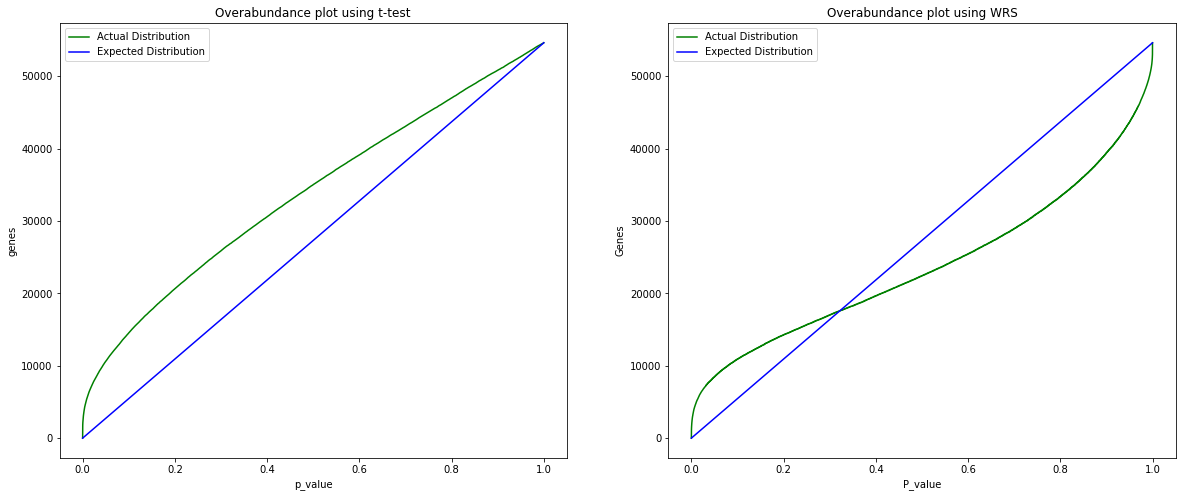

In [ ]:
# plot according to the lecture notes:
y = np.arange(1, len(df)+1)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].plot(p_vals_T_sorted, y, label='Actual Distribution', color="Green")
axes[0].plot(np.linspace(0,1), np.linspace(0,len(df)), label='Expected Distribution', color="Blue")
axes[0].set(xlabel='p_value', ylabel='genes')
axes[0].set_title('Overabundance plot using t-test')
axes[0].legend()

axes[1].plot(p_vals_WRS_sorted, y, label='Actual Distribution', color="Green")
axes[1].plot(np.linspace(0,1), np.linspace(0,len(df)), label='Expected Distribution', color="Blue")
axes[1].set(xlabel='P_value', ylabel='Genes')
axes[1].set_title('Overabundance plot using WRS')
axes[1].legend();

2. Select any 3 differentially expressed genes, from D (which
was defined in 3d), and produce a graphical representation of
their expression patterns that demonstrates the observed DE.

In [ ]:
df3 = most_sig_genes_df.sample(n=3)
df3

,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,GSM1620829,GSM1620830,GSM1620831,GSM1620832,GSM1620833,GSM1620834,GSM1620835,GSM1620836,GSM1620837,GSM1620838,GSM1620839,GSM1620840,GSM1620841,GSM1620842,GSM1620843,GSM1620844,GSM1620845,GSM1620846,GSM1620847,GSM1620848,GSM1620849,GSM1620850,GSM1620851,GSM1620852,GSM1620853,GSM1620854,GSM1620855,GSM1620856,GSM1620857,GSM1620858,...,GSM1620878,GSM1620879,GSM1620880,GSM1620881,GSM1620882,GSM1620883,GSM1620884,GSM1620885,GSM1620886,GSM1620887,GSM1620888,GSM1620889,GSM1620890,GSM1620891,GSM1620892,GSM1620893,GSM1620894,GSM1620895,GSM1620896,GSM1620897,GSM1620898,GSM1620899,GSM1620900,GSM1620901,GSM1620902,GSM1620903,GSM1620904,GSM1620905,GSM1620906,GSM1620907,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
235310_at,6.590359,7.161141,6.133729,6.893969,7.129899,6.102880,7.661389,6.787713,7.946135,7.353044,6.912843,6.059718,6.848505,5.356849,5.197570,5.757972,6.137842,5.774974,5.035185,5.760334,6.500662,6.258457,4.938885,7.120969,6.106901,7.280299,7.104724,6.306269,6.726850,7.012140,7.413101,7.463845,6.760286,5.535260,7.275341,6.317742,8.378668,7.644041,5.946999,7.469630,...,4.281846,5.116385,5.041388,5.687830,5.546301,5.133751,5.717915,5.345140,5.577329,5.883131,5.796226,4.460365,3.374678,4.512057,5.704140,6.243813,6.012014,4.181663,5.480530,4.376391,7.198729,6.970898,5.607683,6.275410,6.949057,5.394771,4.620030,4.270346,5.696691,5.880364,4.735157,6.244044,4.107785,5.383619,5.828144,6.102197,5.260834,5.823745,7.351874,5.597198
64418_at,9.418805,8.977469,8.908447,9.801628,9.578200,9.260265,9.335303,8.951378,9.266826,9.005006,9.431477,9.336343,9.518538,7.578558,9.130245,7.111373,8.848916,8.832759,7.718801,8.465355,7.141779,9.234182,9.313628,9.358549,10.054056,9.240569,9.349736,8.818273,8.968051,9.574624,9.447102,8.904518,8.950385,8.579033,9.950096,9.533391,9.671632,9.463623,9.990696,8.974066,...,6.801776,9.403783,8.270764,5.271272,9.053410,5.606207,6.696351,4.304357,8.036520,6.992509,6.999577,5.231869,4.892780,8.361797,5.731777,10.294542,6.517744,7.410140,10.056850,9.753714,9.191964,7.615416,9.732632,9.153521,9.588720,8.142406,5.254082,8.114414,8.652698,7.720667,8.199058,8.975986,7.265586,8.660925,5.624896,5.896140,7.048513,8.374198,9.552706,9.655361
202741_at,11.817750,11.691269,11.172897,11.515028,11.716486,11.300360,11.633182,11.326006,11.487696,11.252817,11.393328,11.360298,11.979047,10.226051,11.280514,10.618514,11.313075,11.247812,10.247342,10.472463,10.137274,11.331780,11.327899,11.304152,11.440601,12.038421,11.446415,11.634832,11.598870,11.699739,11.682414,11.360622,11.400875,10.652099,11.941561,11.783235,12.010972,11.559975,11.739122,12.068085,...,10.182004,11.004267,10.769789,9.171494,10.936892,9.521579,10.316857,5.660738,10.324059,9.982552,8.207372,9.035925,9.479368,10.758888,8.481788,11.680650,6.926932,11.106351,10.968048,11.515309,11.854387,6.394431,11.880086,11.458026,11.952201,10.493792,7.971389,10.172205,10.796786,8.387132,11.136303,11.231771,10.908175,10.139706,5.665894,6.072555,9.852431,10.073991,11.618290,11.020836


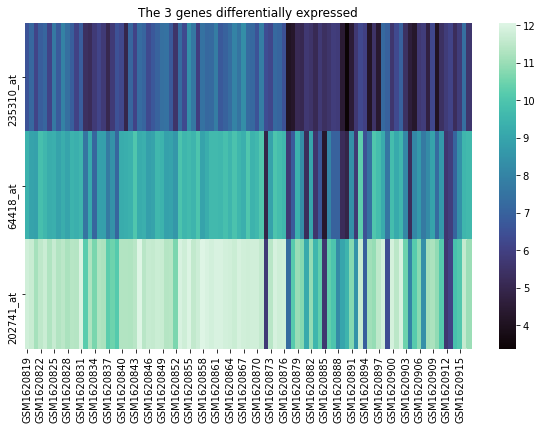

In [ ]:
plt.figure(figsize=(10,6))
plt.title('The 3 genes differentially expressed')
sns.heatmap(df3, cmap='mako');

3. Heatmap
Draw a heatmap representation of the expression values of
the genes in D (from 3d), across the entire cohort (all
samples). Order the genes and the samples to produce the
maximal visual effect.

In [ ]:
M_df = most_sig_genes_df.iloc[:,np.argwhere((np.array(classes) == 'M')).flatten()]
H_df =  most_sig_genes_df.iloc[:,np.argwhere((np.array(classes) == 'H')).flatten()]
sorted_df = pd.concat([M_df, H_df], axis=1)

We sorted the columns by diseased patients on the left half and healthy ones in the right half. The rows/genes themselves are sorted by their p values from most to least significant. 

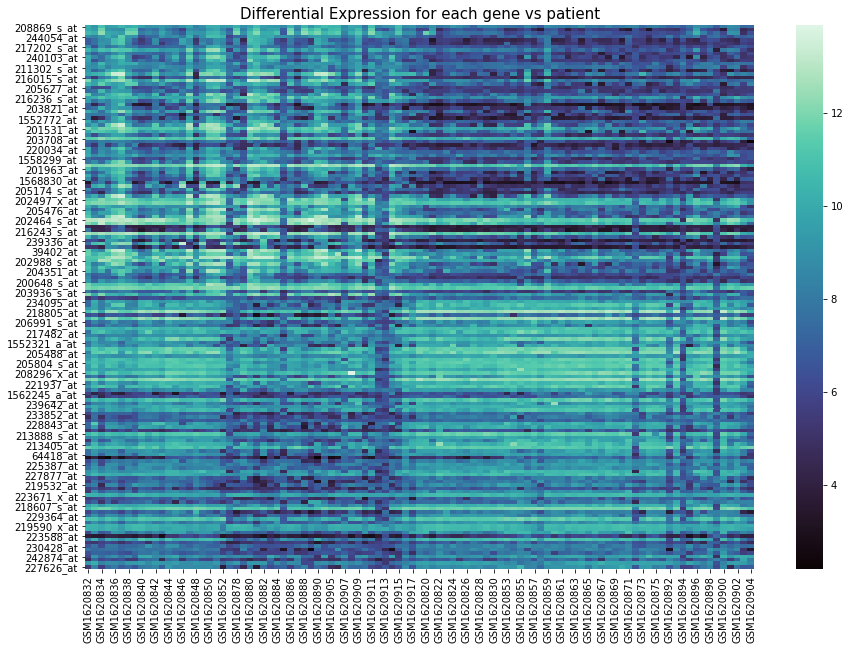

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(sorted_df, cmap='mako')
plt.title('Differential Expression for each gene vs patient', fontsize=15);

End of Assingment 